In [2]:
# 첫 번째 신경망 훈련하기: 기초적인 분류 문제
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 
               'Trouser', 
               'Pullover', 
               'Dress', 
               'Coat',
               'Sandal', 
               'Shirt', 
               'Sneaker', 
               'Bag', 
               'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

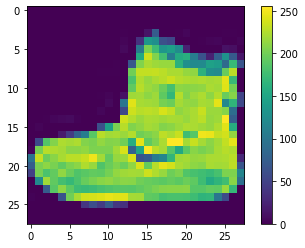

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

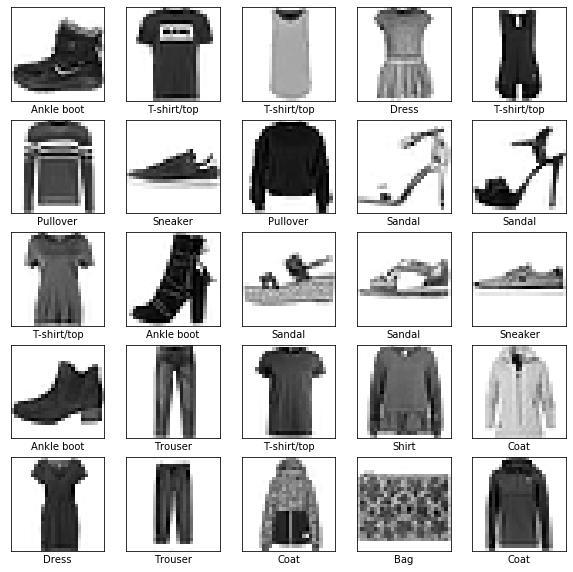

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 22s 370us/sample - loss: 0.4970 - accuracy: 0.8248
Epoch 2/10
60000/60000 [==============================] - 20s 338us/sample - loss: 0.3739 - accuracy: 0.8659
Epoch 3/10
60000/60000 [==============================] - 20s 339us/sample - loss: 0.3346 - accuracy: 0.8796
Epoch 4/10
60000/60000 [==============================] - 21s 344us/sample - loss: 0.3130 - accuracy: 0.8859
Epoch 5/10
60000/60000 [==============================] - 20s 334us/sample - loss: 0.2924 - accuracy: 0.8924
Epoch 6/10
60000/60000 [==============================] - 20s 326us/sample - loss: 0.2801 - accuracy: 0.8971
Epoch 7/10
60000/60000 [==============================] - 19s 318us/sample - loss: 0.2658 - accuracy: 0.9017
Epoch 8/10
60000/60000 [==============================] - 19s 312us/sample - loss: 0.2566 - accuracy: 0.9046
Epoch 9/10
60000/60000 [==============================] - 19s 314us/sample - loss: 0.2467 - accuracy: 0.9

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\n accuracy:', test_acc)
predictions = model.predict(test_images)
predictions[0]

10000/1 - 2s - loss: 0.2424 - accuracy: 0.8841

 accuracy: 0.8841


array([9.6033062e-08, 1.3840416e-08, 1.5536553e-08, 4.0318141e-11,
       5.4249131e-07, 1.5739730e-05, 6.2425306e-07, 5.8798056e-02,
       1.4888680e-07, 9.4118482e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [17]:
test_labels[0]

9

In [18]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

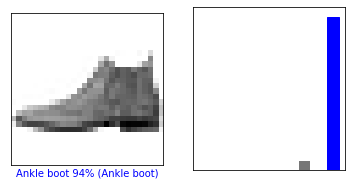

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

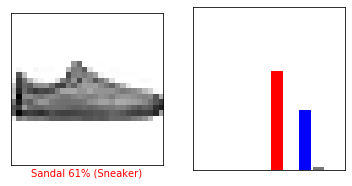

In [20]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

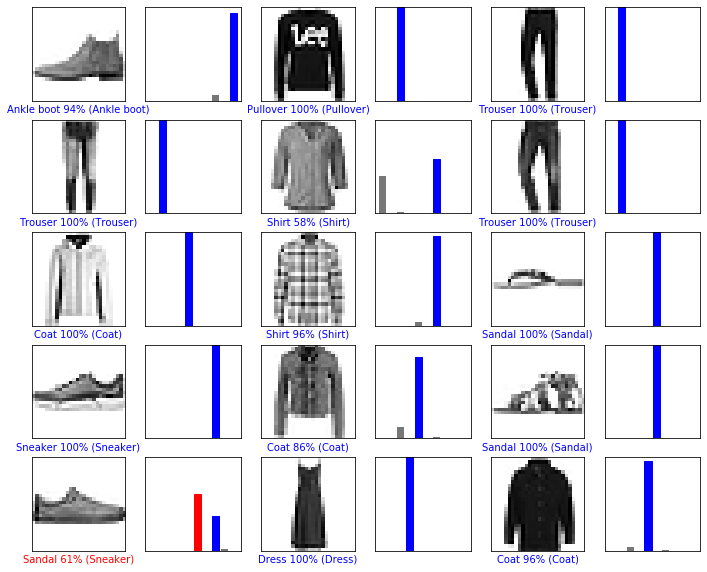

In [21]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

(28, 28)
(1, 28, 28)
[[9.6032863e-08 1.3840362e-08 1.5536550e-08 4.0318058e-11 5.4249023e-07
  1.5739726e-05 6.2425357e-07 5.8798105e-02 1.4888677e-07 9.4118470e-01]]


9

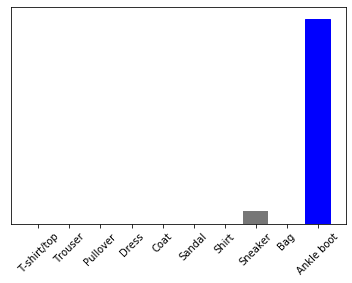

In [23]:
img = test_images[0]

print(img.shape)
img = (np.expand_dims(img,0))

print(img.shape)
predictions_single = model.predict(img)

print(predictions_single)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
np.argmax(predictions_single[0])